# python机器学习之用逻辑回归制作评分卡（个人消费类贷款数据案例实战）

## 一、数据清洗

### 1、导库，获取数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
 
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。
#通常都是在建模过程中逐渐导入需要的库。
# data = pd.read_csv('../数据/rankingcard.csv',index_col=0)
# data.head()
data = pd.read_csv(r"D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\GiveMeSomeCredit\cs-training.csv").drop(columns = 'Unnamed: 0')
data.SeriousDlqin2yrs = data.SeriousDlqin2yrs.astype('int')
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2、探索数据与数据预处理

In [2]:
#观察数据结构
data.shape#(150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [3]:
#去除重复值
data.drop_duplicates(inplace=True)#inplace=True表示替换原数据
data.info()
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [4]:
#探索缺失值
data.info()
# data.isnull().sum()/data.shape[0]#得到缺失值的比例
data.isnull().mean()#上一行代码的另一种形式书写

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

### 3、使用随机森林填补缺失值

In [5]:
def remove_outliers(df):
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] <= 10]
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTime60-89DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTimes90DaysLate'] < 96]
    df = df.loc[(df['DebtRatio'] <= df['DebtRatio'].quantile(0.95))]
    df = df.loc[(df['age'] >= 20)]
    return df

data = remove_outliers(data)
data.shape

# # 填充缺失值
# data['NumberOfDependents'].fillna(0,inplace=True)
# 删除缺失值
data= data.loc[data['NumberOfDependents'].notna()]

In [6]:
# def fill_missing_rf(X,y,to_fill):

#     """
#     使用随机森林填补一个特征的缺失值的函数

#     参数：
#     X：要填补的特征矩阵
#     y：完整的，没有缺失值的标签
#     to_fill：字符串，要填补的那一列的名称
#     """

#     #构建我们的新特征矩阵和新标签
#     df = X.copy()
#     fill = df.loc[:,to_fill]
#     df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

#     # 找出我们的训练集和测试集
#     Ytrain = fill[fill.notnull()]
#     Ytest = fill[fill.isnull()]
#     Xtrain = df.iloc[Ytrain.index,:]
#     Xtest = df.iloc[Ytest.index,:]

#     #用随机森林回归来填补缺失值
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(Xtrain, Ytrain)
#     Ypredict = rfr.predict(Xtest)

#     return Ypredict


# 写法1
# def fill_missing_rf(data,to_fill):
     
#     # 使用随机森林填补一个特征的缺失值的函数
#     # to_fill = 'MonthlyIncome'
#     train_data = data.dropna()
#     test_data = data.loc[data[to_fill].isna()]
#     print(data.shape,train_data.shape,test_data.shape)
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(train_data.loc[:,train_data.columns != to_fill], train_data[to_fill])
#     Ypredict = rfr.predict(test_data.loc[:,train_data.columns != to_fill])
#     return(Ypredict)
# 写法2

def fill_missing_rf(data,to_fill):
    # 使用随机森林填补一个特征的缺失值的函数
    # to_fill = 'MonthlyIncome'
    train_data = data.dropna()
    test_data = data.loc[data[to_fill].isna()].drop(columns=to_fill)
    print(data.shape,train_data.shape,test_data.shape)
    X=train_data.drop(columns=to_fill)
    y=train_data[to_fill]
    print(X.shape,y.shape)

    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=30)
    rfr = rfr.fit(X,y)
    Ypredict = rfr.predict(test_data)
    return(Ypredict)

In [7]:
y_pred = fill_missing_rf(data,to_fill = "MonthlyIncome")
data.loc[data["MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

(138393, 11) (119643, 11) (18750, 10)
(119643, 10) (119643,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 138393 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      138393 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  138393 non-null  float64
 2   age                                   138393 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  138393 non-null  int64  
 4   DebtRatio                             138393 non-null  float64
 5   MonthlyIncome                         138393 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       138393 non-null  int64  
 7   NumberOfTimes90DaysLate               138393 non-null  int64  
 8   NumberRealEstateLoansOrLines          138393 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  138393 non-null  int64  
 10  NumberO

### 4、描述性统计处理异常值

In [8]:
#描述性统计
# data.describe()
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,138393.0,0.067294,0.250531,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,138393.0,5.700916,249.030511,0.0,0.0,0.003409,0.030675,0.156325,0.558882,0.977243,1.097612,50708.0
age,138393.0,52.069368,14.714603,21.0,24.0,32.000000,41.000000,52.000000,62.000000,72.000000,86.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,138393.0,0.247751,0.696452,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,10.0
DebtRatio,138393.0,129.992254,430.647268,0.0,0.0,0.030323,0.165398,0.340373,0.647451,221.000000,2180.080000,2458.0
MonthlyIncome,138393.0,5838.879457,13659.715008,0.0,0.0,0.433333,2500.000000,4800.000000,7700.000000,11000.000000,24000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,138393.0,8.458542,5.111518,0.0,1.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,138393.0,0.093227,0.493653,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,138393.0,0.990014,1.109998,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,138393.0,0.066188,0.332930,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.0


### 5、样本不均衡问题

In [9]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡
 
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))
#样本个数：149165; 1占6.62%; 0占93.38%

样本个数：138393; 1占6.73%; 0占93.27%


### 6、使用采样方法来平衡样本

In [10]:
#如果报错，就在prompt安装：pip install imblearn
# import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1,k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)


# #smote
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42) #实例化
# X,y = sm.fit_sample(X,y)
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%


样本个数：38724; 1占33.33%; 0占66.67%


### 7、分训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
 
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
 
# model_data.to_csv(r".\model_data.csv")#训练数据
# vali_data.to_csv(r".\vali_data.csv")#验证数据

## 二、分箱

分箱步骤：

1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组

2）确保每一组中都要包含两种类别的样本，否则IV值会无法计算

3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止

4）我们让一个特征分别分成[2,3,4…20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数

5）分箱完毕后，我们计算每个箱的WOE值， bad%，观察分箱效果

### 将选取最佳分箱个数的过程包装为函数

In [26]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''
    import scipy
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        # i = pvs.index(min(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df


RevolvingUtilizationOfUnsecuredLines


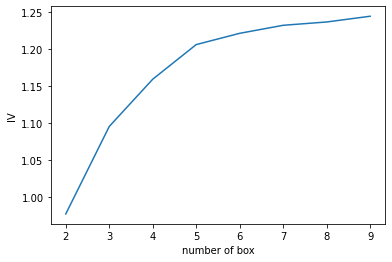

age


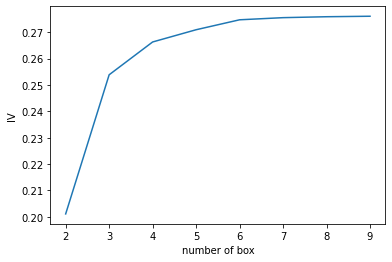

DebtRatio


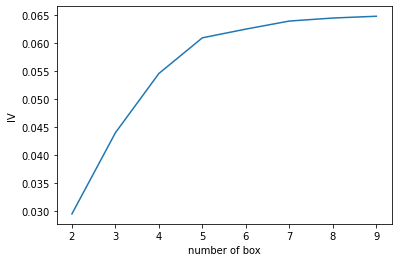

MonthlyIncome


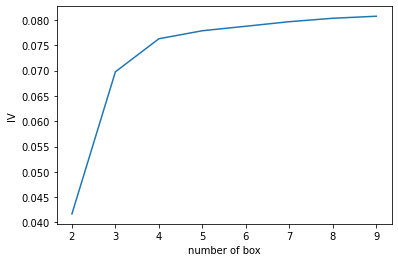

NumberOfOpenCreditLinesAndLoans


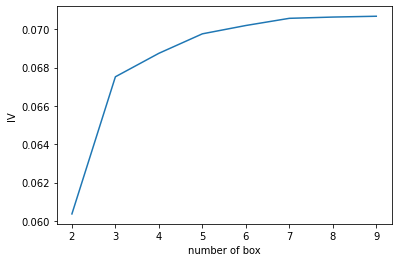

In [27]:
import matplotlib.pyplot as plt
import scipy
auto_col = ["RevolvingUtilizationOfUnsecuredLines","age","DebtRatio", "MonthlyIncome","NumberOfOpenCreditLinesAndLoans"]

for i in auto_col:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=10)

In [28]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}


In [29]:
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col


{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.1118785015,
  0.2266299035,
  0.49820024000000007,
  0.8278036353130777,
  0.9999999,
  inf],
 'age': [-inf, 42.0, 53.0, 56.0, 66.0, inf],
 'DebtRatio': [-inf,
  0.36177913593507816,
  0.67891427725,
  1.5146152537500057,
  inf],
 'MonthlyIncome': [-inf, 0.16666666666666666, 6642.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 13.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 三、计算各箱的WOE并映射到数据中

### 包装成函数

In [30]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall


{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.112]     1.563735
 (0.112, 0.227]    0.867498
 (0.227, 0.498]    0.107624
 (0.498, 0.828]   -0.665797
 (0.828, 1.0]     -1.143903
 (1.0, inf]       -2.058887
 dtype: float64,
 'age': cut
 (-inf, 42.0]   -0.465281
 (42.0, 53.0]   -0.184969
 (53.0, 56.0]    0.061113
 (56.0, 66.0]    0.489341
 (66.0, inf]     1.177937
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.362]     0.176913
 (0.362, 0.679]   -0.172224
 (0.679, 1.515]   -0.602549
 (1.515, inf]      0.159878
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.167]      0.888073
 (0.167, 6642.0]   -0.192604
 (6642.0, inf]      0.325395
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -1.014764
 (1.0, 3.0]    -0.284824
 (3.0, 5.0]    -0.000053
 (5.0, 13.0]    0.173856
 (13.0, inf]    0.033638
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.476526
 (0.0, 1.0]    -0.916150
 (1.0, 2.0]    -1.595317
 (2.0, inf]    -1.996890
 dtype: flo

In [31]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head()


,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.184969,0.867498,0.176913,0.325395,-0.000053,0.476526,0.336827,0.245311,0.222585,-0.252330,0
1,-0.465281,-1.143903,0.159878,-0.192604,-1.014764,0.476526,-2.566053,-0.269325,0.222585,0.296211,1
2,0.489341,1.563735,0.159878,0.888073,0.173856,0.476526,0.336827,0.277082,0.222585,0.296211,0
3,-0.184969,0.107624,-0.172224,-0.192604,0.173856,-0.916150,0.336827,0.277082,0.222585,-0.252330,1
4,0.489341,0.107624,0.176913,0.325395,0.033638,0.476526,0.336827,-0.803427,0.222585,0.296211,1


## 四、建模与模型验证

In [32]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]


In [33]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
 
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)#0.8641356370249832

0.7883456705112756

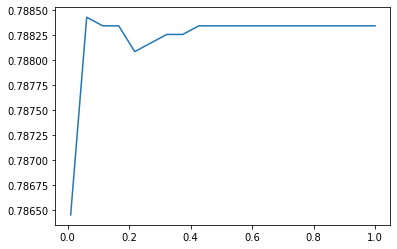

e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number o

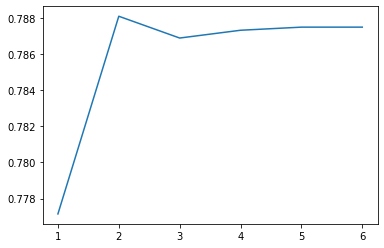

In [34]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

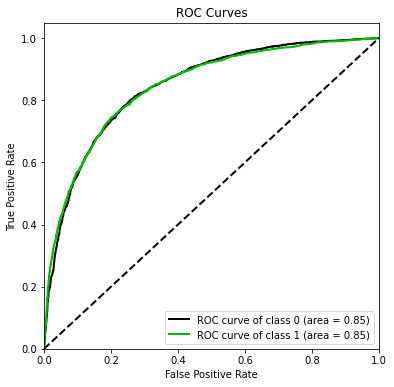

In [35]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)


## 五、制作评分卡

In [36]:
# pdo =20 ,特定分数为60 , odds = 1/60
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [37]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数


cut
(-inf, 42.0]    -8.992675
(42.0, 53.0]    -3.574967
(53.0, 56.0]     1.181147
(56.0, 66.0]     9.457700
(66.0, inf]     22.766487
dtype: float64

In [38]:
file = r"D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\GiveMeSomeCredit\ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")
